# Table of Contents
1. [Introduction](#introduction)
   1. [Project Overview](#project-overview)
   2. [Dataset Description](#dataset-description)
2. [Data Collection](#data-collection)
   1. [Source of Data](#source-of-data)
   2. [Dataset Features](#dataset-features)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
   1. [Statistical Summary](#statistical-summary)
   2. [Distribution Analysis](#distribution-analysis)
   3. [Correlation Study](#correlation-study)
   4. [Outlier Identification](#outlier-identification)
4. [Data Preprocessing](#data-preprocessing)
   1. [Handling Missing Values](#handling-missing-values)
   2. [Outlier Detection](#outlier-detection)
   3. [Feature Scaling](#feature-scaling)
5. [Feature Engineering](#feature-engineering)
   1. [Feature Selection](#feature-selection)
   2. [Feature Transformation](#feature-transformation)
6. [Model Selection and Training](#model-selection-and-training)
   1. [Choosing the Right Model](#choosing-the-right-model)
   2. [Training Process](#training-process)
7. [Model Evaluation and Tuning](#model-evaluation-and-tuning)
   1. [Evaluation Metrics](#evaluation-metrics)
   2. [Hyperparameter Optimization](#hyperparameter-optimization)
8. [Results and Discussion](#results-and-discussion)
   1. [Model Performance](#model-performance)
   2. [Feature Importance](#feature-importance)
   3. [Insights](#insights)
9. [Conclusion and Recommendations](#conclusion-and-recommendations)
   1. [Key Findings](#key-findings)
   2. [Recommendations](#recommendations)
   3. [Future Scope](#future-scope)
10. [References](#references)
    1. [Literature Cited](#literature-cited)

## Introduction <a name="introduction"></a>

### Project Overview <a name="project-overview"></a>
- Overview of the project's objectives and significance in the wine industry.



The field of oenology, or the study of wines, is an area of both ancient tradition and modern scientific exploration. The project at hand aims to bridge these two realms by applying contemporary machine learning techniques to the assessment of red wine quality. This study focuses on developing a predictive model that accurately gauges wine quality based on a range of physicochemical properties, replacing the subjective nature of human sensory evaluation with objective, data-driven insights.

**4 minutes to run**

### Dataset Description <a name="dataset-description"></a>
- Brief description of the dataset and the problem statement.


[Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)

The dataset employed in this study is comprised of various physicochemical characteristics of red wines. It includes key features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free and total sulfur dioxide, density, pH, sulphates, and alcohol content. The target variable is the wine's quality, rated on a scale from 0 to 10. This rating is based on evaluations by human tasters, providing a subjective standard against which our model's predictions will be compared. Understanding and quantifying the relationship between these variables and the perceived quality is the challenge this project seeks to address.


In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# setting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

from scipy.stats import skew
# Current version of Seaborn generates a bunch of warnings that we'll ignore in this tutorial
import warnings
warnings.filterwarnings("ignore")
# Command to tell Python to actually display the graphs
%matplotlib inline
sns.set()

# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

#Models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression, Lasso
from sklearn.naive_bayes import GaussianNB

#Misc
from sklearn.model_selection import train_test_split, GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import imblearn
from imblearn.over_sampling import SMOTE


## Data Collection <a name="data-collection"></a>

### Source of Data <a name="source-of-data"></a>
- Information about the dataset source.

The primary data source for this project is the UCI Machine Learning Repository, a well-known repository in the machine learning community for its wide range of datasets. The red wine dataset was chosen for its relevance and comprehensiveness in terms of the number of samples and the variety of features available for analysis.

It is semicolon-separated, and contains two files, one for red and one for white wine.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

file_path = '/content/drive/MyDrive/Y2S2/PDS/Assignment/'
df_red = pd.read_csv(file_path + 'winequality-red.csv', sep=';')
df_white = pd.read_csv(file_path + 'winequality-white.csv', sep=';')

Mounted at /content/drive/


### Dataset Features <a name="dataset-features"></a>
- Details of the dataset features and target variable.

The dataset features can be broadly categorized into two groups: chemical properties and quality assessment. The chemical properties include:
1. Fixed Acidity
2. Volatile Acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

The target variable, representing quality assessment, is:
12. Quality (score between 0 and 10)

## Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis"></a>

### Statistical Summary <a name="statistical-summary"></a>
- Statistical summary of the data.

In [3]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


In [4]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


The columns and values of the two datasets are identical. However, we shouldn't merge them together, because they represent two different wines, and as such, impact subjective tastes when it comes to quality, even if the physicochemical indicators are the same.

In [5]:
df_red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.00,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.00,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.00,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.00,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.00,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.00,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.00,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.00,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.00,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.00,0.66,0.17,0.33,0.55,0.62,0.73,2.00


We can compare skewness by looking at mean vs 50%(median). In a perfect normal distribution, these two values would be the same. The further these two values are, the more skewed it would be. From this summary, we can find that some values are quite skewed, like `total sulfur dioxide`

In [6]:
df_white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.00,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.00,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.00,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.00,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.00,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.00,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.00,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.00,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.00,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.00,0.49,0.11,0.22,0.41,0.47,0.55,1.08


and for white wine, `total sulfur dioxide` and `free sulfur dioxide` is also skewed

The statistical summary of these two dataset show that the values of the different physicochemical indicators are very different depending on red or white wine tasting. This further supports that we shouldn't merge them together.


In [7]:
df_red.duplicated().sum()

240

In [8]:
df_white.duplicated().sum()

937

we have quite abit of duplicate rows that we can remove.

### Distribution Analysis <a name="distribution-analysis"></a>
- Analysis of the distribution of the target variable and key features.

However, we would need to temporarily merge them together to allow for more efficient analysis.

In [9]:
# Assuming df_red and df_white are your existing DataFrames for red and white wines
df_red['wine_type'] = 'Red'
df_white['wine_type'] = 'White'

# Combine the two DataFrames into one
df_combined = pd.concat([df_red, df_white], ignore_index=True)

Now, we can plot the histogram. we will need to normalize the frequency by setting density=True, since white wine has around 3-4x more rows than red wine.

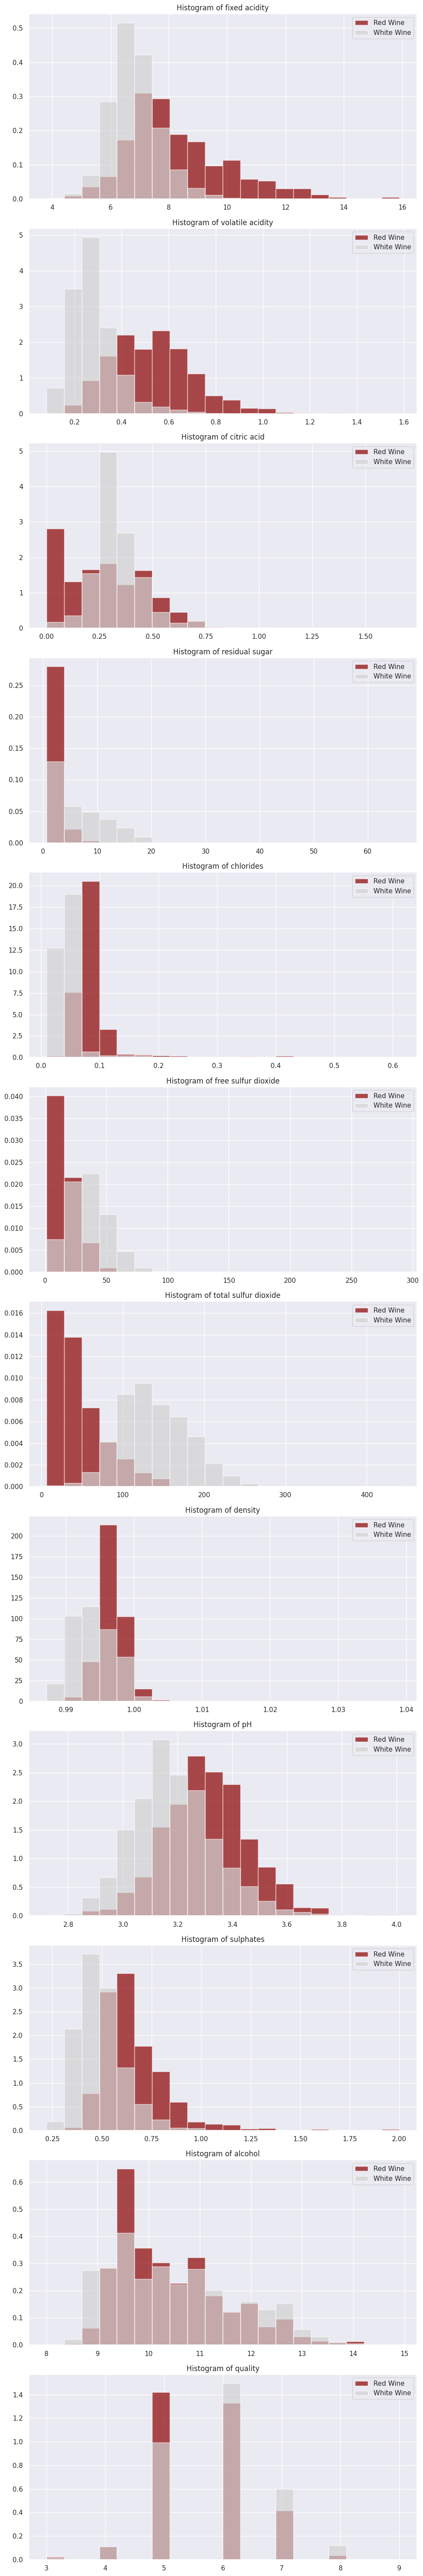

In [10]:
# Now plot histograms with both red and white wines on the same plot for comparison
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
             'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Find the global min and max for each variable
global_min_max = {var: (df_combined[var].min(), df_combined[var].max()) for var in variables}

# Plot the histograms
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 5 * len(variables)))

for i, var in enumerate(variables):
    # Select the range based on global min and max
    bin_range = global_min_max[var]

    # Plot histograms for both types of wine on the same subplot
    axs[i].hist(df_combined[df_combined['wine_type'] == 'Red'][var], bins=20, range=bin_range, color='darkred', alpha=0.7, label='Red Wine', density = True)
    axs[i].hist(df_combined[df_combined['wine_type'] == 'White'][var], bins=20, range=bin_range, color='lightgrey', alpha=0.7, label='White Wine', density = True)
    # white wine is usually more yellowish, but to make our graphs easier to see, we associate the color of white wine with something more whitish
    axs[i].set_title(f'Histogram of {var}')
    axs[i].legend()

plt.tight_layout()
plt.show()

Most of these variables show a roughly unimodal (aka single peak) distribution.


| Variable             | Red Wine Insights | White Wine Insights |
|----------------------|-------------------|---------------------|
| Fixed Acidity        | Higher levels, indicating a general trend towards greater acidity. | Lower levels, suggesting a wider range of acidity, but generally less acidic than red wines. |
| Volatile Acidity     | Wider spread, with a tendency for higher volatile acidity. | Narrower spread, suggesting a lower volatile acidity overall. |
| Citric Acid          | Broader distribution, with more variation in citric acid content. | Concentration towards lower end of citric acid scale. |
| Residual Sugar       | Lower residual sugar content, clustering at the lower end. | Much higher residual sugar content, indicating a tendency to be sweeter. |
| Chlorides            | Higher levels of chlorides. | Lower chloride content, with a higher density at the lower levels. |
| Free Sulfur Dioxide  | Lower levels compared to white wines. | Significantly higher concentration, indicative of preservation practices for freshness. |
| Total Sulfur Dioxide | Lower total sulfur dioxide levels. | Higher levels of total sulfur dioxide, consistent with the use of sulfites as preservatives. |
| Density              | Similar density distribution across the range, suggesting little difference in density. | Similar density distribution to red wine, with no significant differences. |
| pH                   | Higher density at higher pH values, less acidic. | Lower pH values on average, indicating higher acidity. |
| Sulphates            | Slightly higher density at increased sulphate levels. | Lower sulphate levels compared to red wines. |
| Alcohol              | Higher density at higher alcohol levels. | Slightly higher density at lower alcohol levels. |
| Quality              | Higher density in higher quality brackets (6-8). | Higher density at moderate quality levels (5-6), fewer in higher quality brackets. |

The table above summarizes the findings we can get between the red and white wine.

**IMPORTANT**
something that can be noted, is that the quality distribution is not even. Namely, the quality 3, 4, and 8 are the vast minority as compared to 567. For this, we will use SMOTE.

Additionally, it is unclear how many classes of quality do we have, since 9 is pretty much invisible. we shall check this


In [11]:
df_red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df_white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

And so it seems, red wine has 6 target variables but white wine has 7. This will be noted and useful to know in the training and evaluation

We can further check on the skewness of each variable

In [13]:
variables = []
red_wine_skewness = []
white_wine_skewness = []

# Loop through each column in the dataframe
for column in df_red.columns:
    # Check if the column contains numerical data
    if df_red[column].dtype == "float64" or df_red[column].dtype == "int64":
        # Append the variable name
        variables.append(column)
        # Calculate the skewness of the column for red wine
        skewness_red = skew(df_red[column])
        # Determine the skewness category for red wine
        if skewness_red <= -1:
            red_wine_skewness.append("highly negative skewness")
        elif -1 < skewness_red <= -0.5:
            red_wine_skewness.append("moderately negative skewness")
        elif -0.5 < skewness_red < 0.5:
            red_wine_skewness.append("approximately symmetric")
        elif 0.5 <= skewness_red < 1:
            red_wine_skewness.append("moderately positive skewness")
        elif skewness_red >= 1:
            red_wine_skewness.append("highly positive skewness")

# Repeat the process for white wine
for column in df_white.columns:
    # Check if the column contains numerical data
    if df_white[column].dtype == "float64" or df_white[column].dtype == "int64":
        # Calculate the skewness of the column for white wine
        skewness_white = skew(df_white[column])
        # Determine the skewness category for white wine
        if skewness_white <= -1:
            white_wine_skewness.append("highly negative skewness")
        elif -1 < skewness_white <= -0.5:
            white_wine_skewness.append("moderately negative skewness")
        elif -0.5 < skewness_white < 0.5:
            white_wine_skewness.append("approximately symmetric")
        elif 0.5 <= skewness_white < 1:
            white_wine_skewness.append("moderately positive skewness")
        elif skewness_white >= 1:
            white_wine_skewness.append("highly positive skewness")

# Create the temporary DataFrame
temp_df = pd.DataFrame({
    'Variable': variables,
    'Red Wine': red_wine_skewness,
    'White Wine': white_wine_skewness
})

# Display the temporary dataframe
temp_df

,Variable,Red Wine,White Wine
0,fixed acidity,moderately positive skewness,moderately positive skewness
1,volatile acidity,moderately positive skewness,highly positive skewness
2,citric acid,approximately symmetric,highly positive skewness
3,residual sugar,highly positive skewness,highly positive skewness
4,chlorides,highly positive skewness,highly positive skewness
5,free sulfur dioxide,highly positive skewness,highly positive skewness
6,total sulfur dioxide,highly positive skewness,approximately symmetric
7,density,approximately symmetric,moderately positive skewness
8,pH,approximately symmetric,approximately symmetric
9,sulphates,highly positive skewness,moderately positive skewness


### Correlation Study <a name="correlation-study"></a>
- Correlation analysis between different features and the target variable.

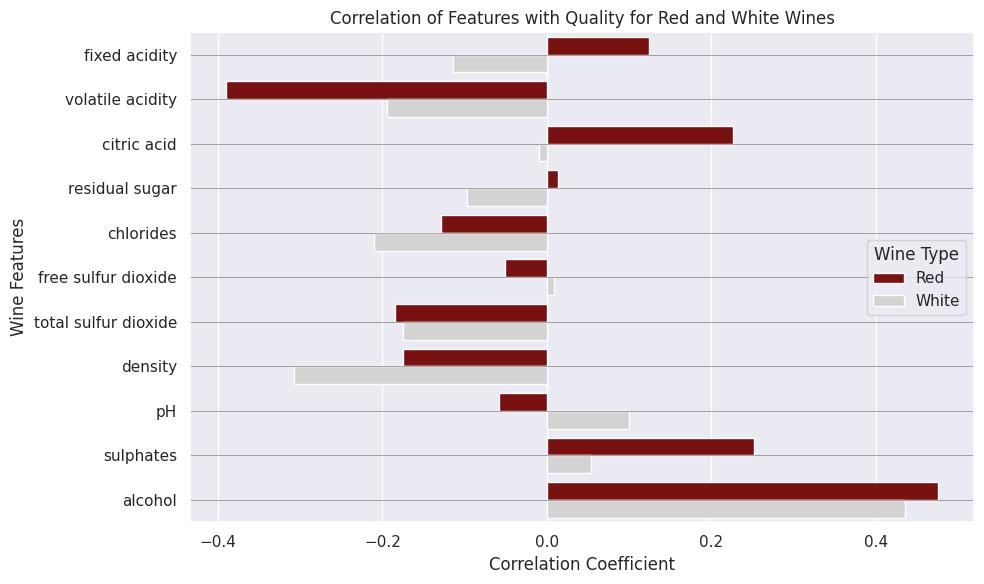

In [14]:
# Calculate the correlation with 'quality' for red and white wines
corr_red_quality = df_red.corr()['quality'].drop('quality')  # Drop the self-correlation of 'quality'
corr_white_quality = df_white.corr()['quality'].drop('quality')  # Drop the self-correlation of 'quality'

# Create a DataFrame to make it easy to plot with Seaborn
df_corr_red_quality = corr_red_quality.reset_index()
df_corr_red_quality.columns = ['Feature', 'Correlation with Quality']
df_corr_red_quality['Wine Type'] = 'Red'

df_corr_white_quality = corr_white_quality.reset_index()
df_corr_white_quality.columns = ['Feature', 'Correlation with Quality']
df_corr_white_quality['Wine Type'] = 'White'

df_corr_combined = pd.concat([df_corr_red_quality, df_corr_white_quality], ignore_index=True)

# Now plot using Seaborn
plt.figure(figsize=(10, 6))

# Create the barplot
ax = sns.barplot(x='Correlation with Quality', y='Feature', hue='Wine Type', data=df_corr_combined,
                 palette={'Red': 'darkred', 'White': 'lightgrey'})

# Add lines to separate variables on the y-axis. it gets hard to see, so need this
for ytick in ax.get_yticks():
    ax.axhline(y=ytick, color='gray', linestyle='-', linewidth=0.5)

plt.title('Correlation of Features with Quality for Red and White Wines')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Wine Features')
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

It seems that no features are too weak to remove. the closest contender would be free sulfur dioxide, but even then, by removing free sulfur dioxide, red wine would lose out on more features than white wine.

| Variable            | Red Wine Correlation with Quality | White Wine Correlation with Quality |
|--------------------|-----------------------------------|-------------------------------------|
| Fixed Acidity      | Negative                          | Negative                            |
| Volatile Acidity   | Strongly Negative                 | Negative                            |
| Citric Acid        | Positive                          | Positive but less pronounced        |
| Residual Sugar     | Negative                          | Positive                            |
| Chlorides          | Negative                          | Negative                            |
| Free Sulfur Dioxide  | Negative                          | Negative                            |
| Total Sulfur Dioxide | Negative                          | Negative                            |
| Density            | Negative                          | Negative                            |
| pH                 | Negative                          | Slightly positive                   |
| Sulphates          | Positive                          | Positive but less pronounced        |
| Alcohol            | Positive                          | Positive                            |


### Outlier Identification <a name="outlier-identification"></a>
- Using box plot to find outliers in the variables

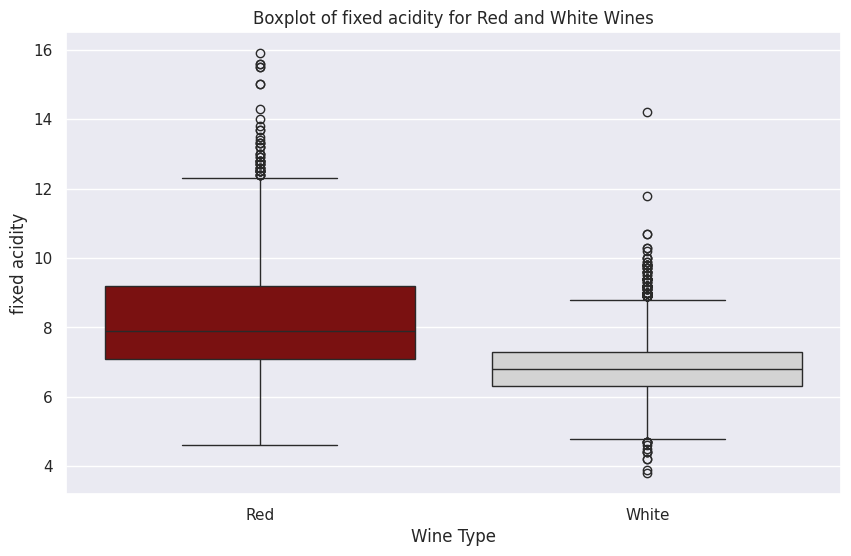

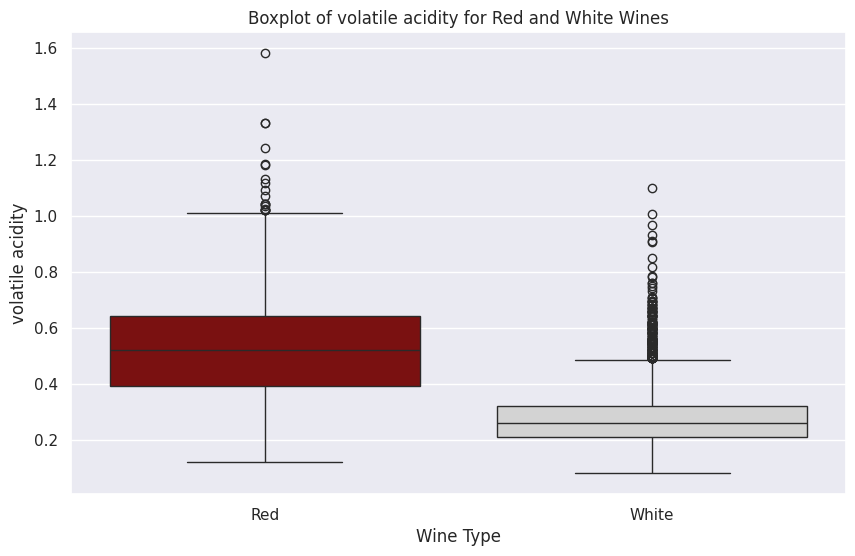

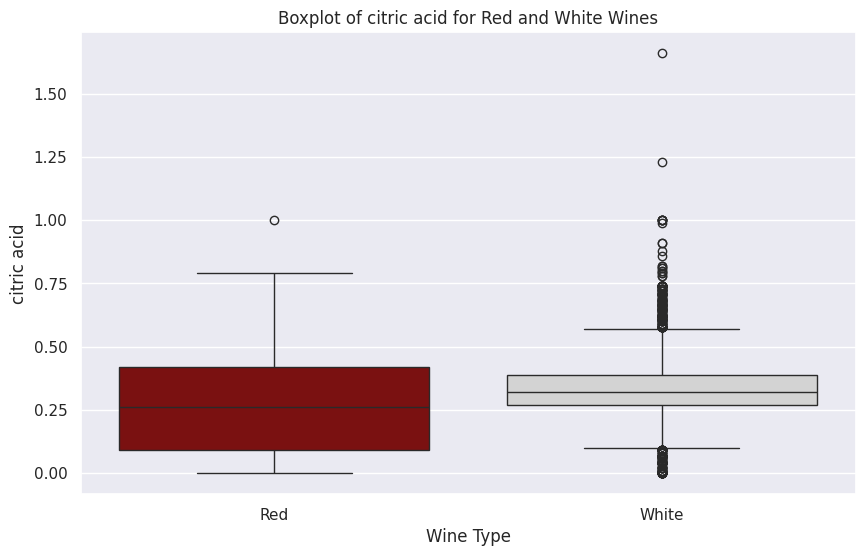

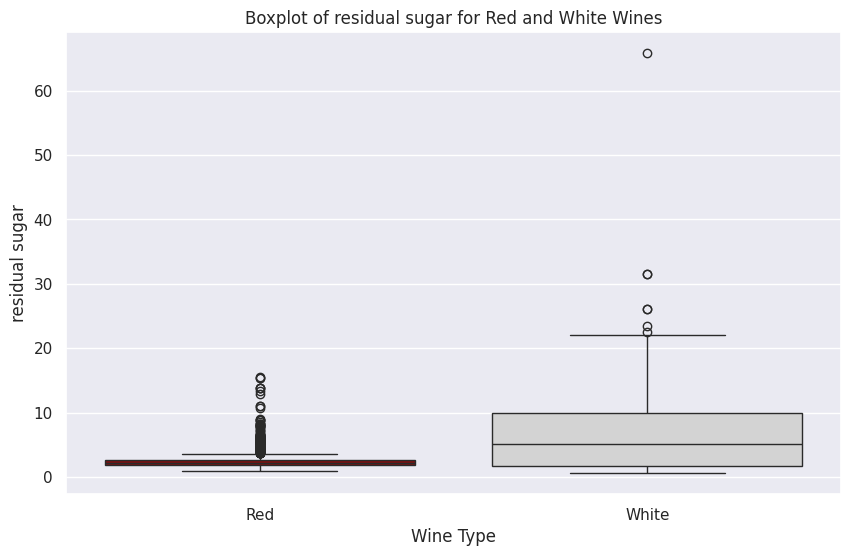

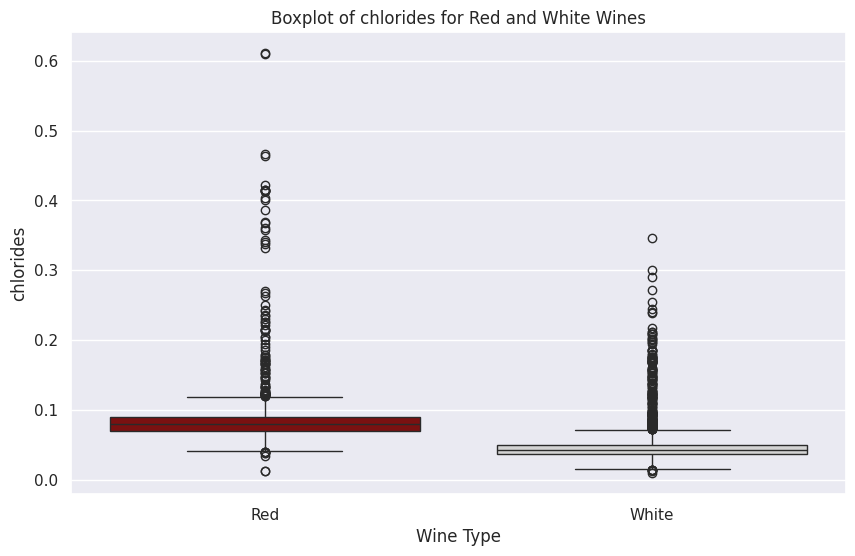

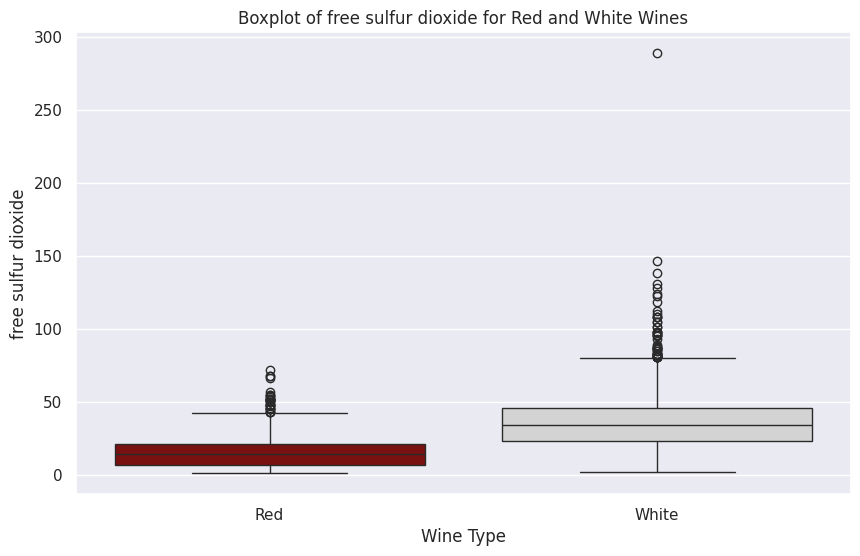

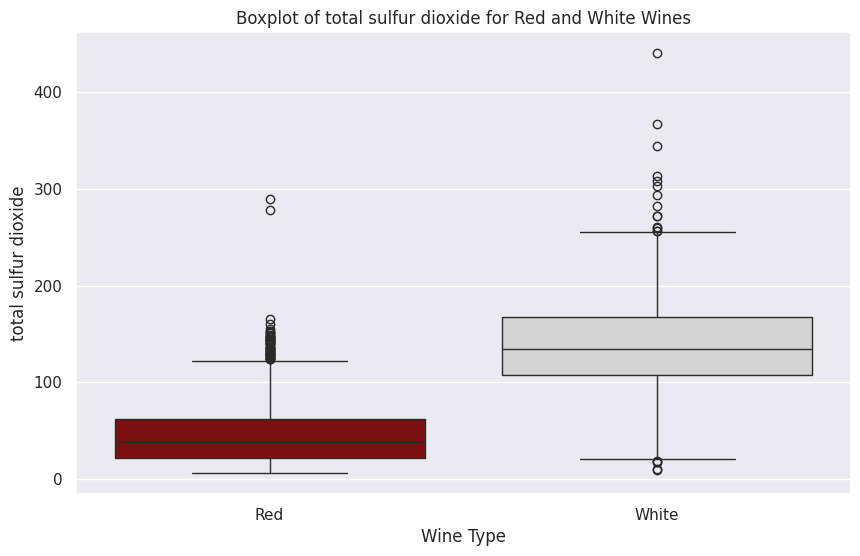

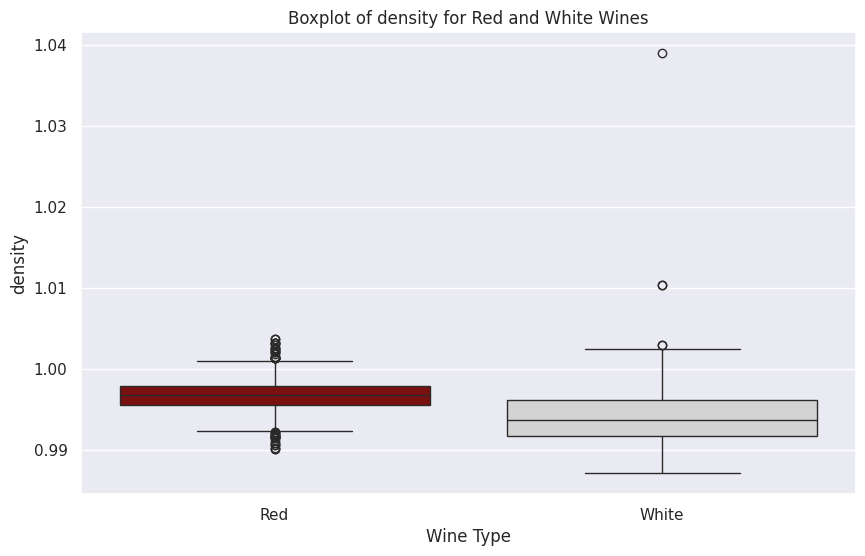

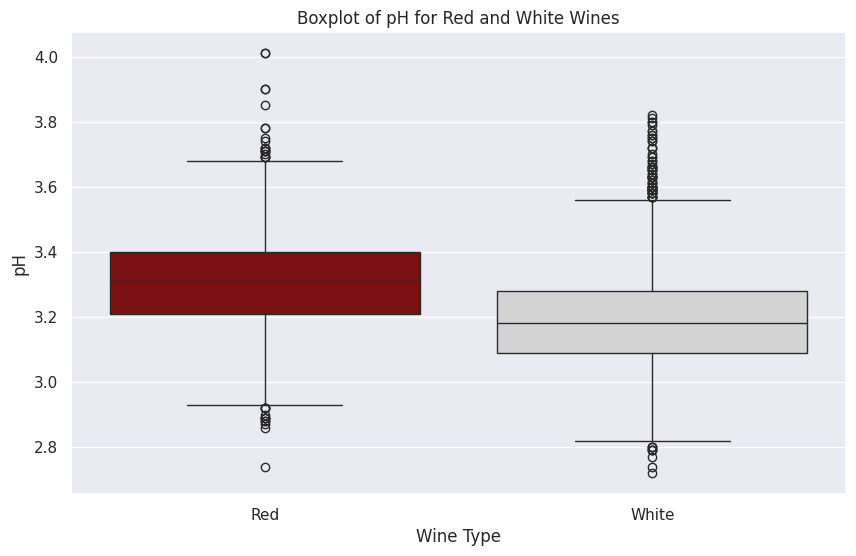

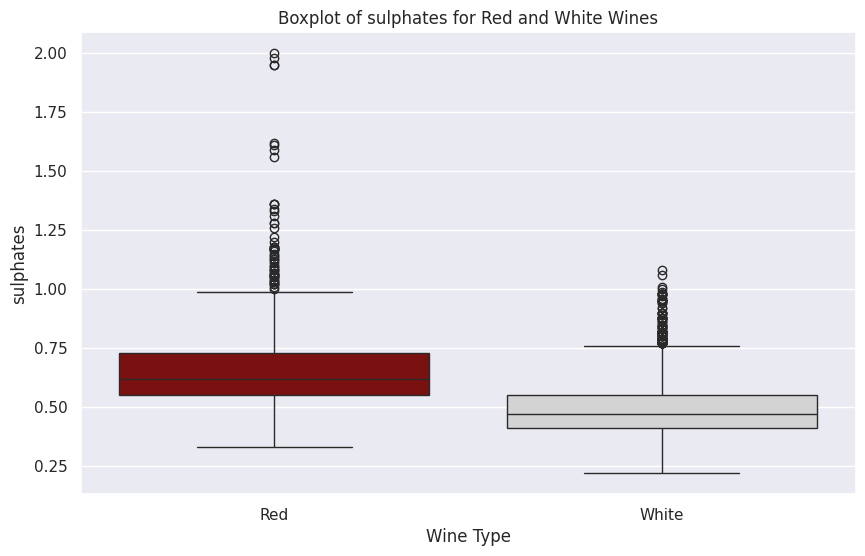

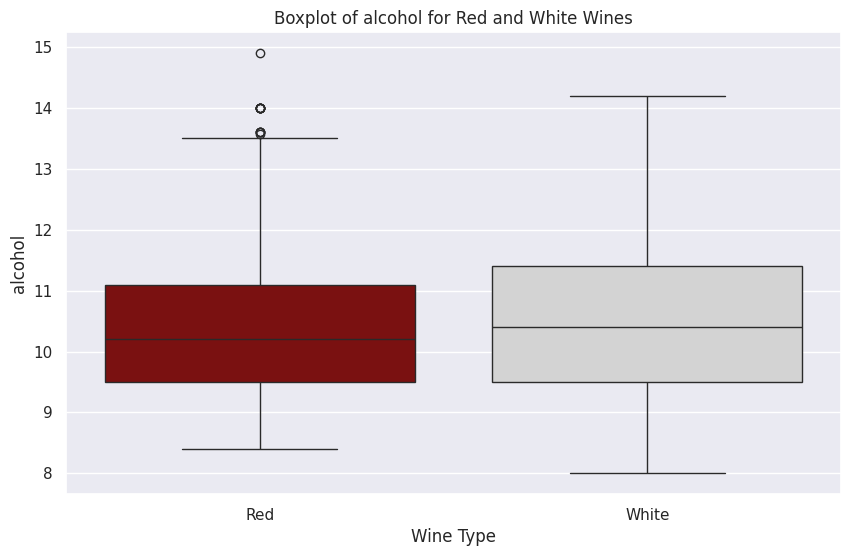

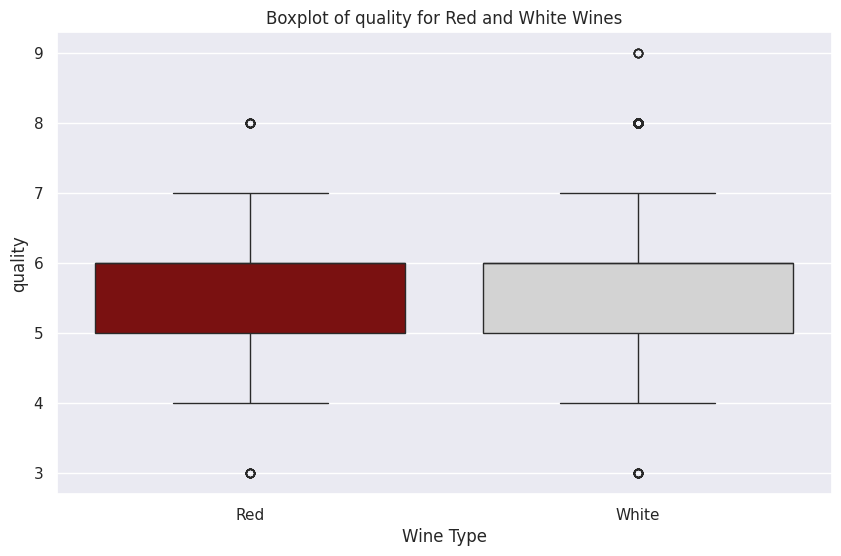

In [15]:
# Plotting the boxplots
for variable in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='wine_type', y=variable, data=df_combined, palette={'Red': 'darkred', 'White': 'lightgrey'})
    plt.title(f'Boxplot of {variable} for Red and White Wines')
    plt.ylabel(variable)
    plt.xlabel('Wine Type')
    plt.show()

In practice, we would have winemakers investigate these outliers to determine whether they are due to measurement errors, unique winemaking processes, or special grape varieties. Let's assume they represent accurate measurements, appealing to particular preferences or represent experimental batches for this experiment. To soften the impact that these outliers has on the model, we can logbase10 the values.

## Data Preprocessing <a name="data-preprocessing"></a>

### Duplicate Dropping <a name="handling-missing-values"></a>
- Dropping duplicates to remove unneccessary rows that slow down our processing.


In [16]:
df_red = df_red.drop_duplicates()
df_white = df_white.drop_duplicates()

Let's also drop `wine_type`

In [17]:
df_red = df_red.drop(['wine_type'], axis=1)
df_white = df_white.drop(['wine_type'], axis=1)

### Outlier Detection <a name="outlier-detection"></a>
- Apply transformations to reduce the impact of skewed variables.
These skewed variables are `residual sugar`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide`.


In [18]:
skewed_vars = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']

Let's apply a log transformation to the `skewed_vars`

In [19]:
for var in skewed_vars:
  df_red[var] = np.log10(df_red[var])
  df_white[var] = np.log10(df_white[var])

In [20]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,0.28,-1.12,1.04,1.53,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,0.41,-1.01,1.40,1.83,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,0.36,-1.04,1.18,1.73,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,0.28,-1.12,1.23,1.78,1.00,3.16,0.58,9.80,6
5,7.40,0.66,0.00,0.26,-1.12,1.11,1.60,1.00,3.51,0.56,9.40,5


In [21]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,1.32,-1.35,1.65,2.23,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,0.20,-1.31,1.15,2.12,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,0.84,-1.30,1.48,1.99,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,0.93,-1.24,1.67,2.27,1.00,3.19,0.40,9.90,6
6,6.20,0.32,0.16,0.85,-1.35,1.48,2.13,0.99,3.18,0.47,9.60,6


### Feature Scaling <a name="feature-scaling"></a>
- The variables have quite different ranges, so we need to standardize/normalize the data.

We have a few options.
1. **StandardScaler**:
   - Standardizes features by removing the mean and scaling to unit variance.
   - Assumes that data is normally distributed within each feature.
   - Sensitive to outliers

2. **MinMaxScaler**:
   - Transforms features by scaling each feature to a given range, typically (0, 1).
   - not sensitive to outliers.
   - Useful when you need to transform features to a specific range.

3. **RobustScaler**:
   - Scales features using statistics that are robust to outliers.
   - Suitable for datasets with outliers, like ours

4. **MaxAbsScaler**:
   - Scales each feature by its maximum absolute value so that the maximum absolute value in each feature is scaled to 1.0.
   - Does not shift/center the data, and therefore does not destroy any sparsity.
   - Suitable for data that is already centered at zero or sparse data.

Our dataset has outliers, so robustscaler would be a good option.

In [22]:
robust_scaler = RobustScaler()
features_to_scale = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
] # everything but quality, which is the target variable.
df_red[features_to_scale] = robust_scaler.fit_transform(df_red[features_to_scale])
df_white[features_to_scale] = robust_scaler.fit_transform(df_white[features_to_scale])

In [23]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.24,0.72,-0.76,-0.47,-0.15,-0.22,-0.11,0.50,1.05,-0.33,-0.50,5
1,-0.05,1.44,-0.76,0.53,0.82,0.53,0.54,0.05,-0.58,0.33,-0.25,5
2,-0.05,0.96,-0.65,0.14,0.58,0.06,0.33,0.14,-0.26,0.17,-0.25,5
3,1.57,-0.96,0.88,-0.47,-0.20,0.18,0.43,0.59,-0.79,-0.22,-0.25,6
5,-0.24,0.56,-0.76,-0.64,-0.20,-0.07,0.05,0.50,1.05,-0.33,-0.50,5


In [24]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.20,0.08,0.33,0.86,0.19,0.46,0.55,1.83,-0.90,-0.21,-0.84,6
1,-0.50,0.33,0.17,-0.63,0.43,-1.28,-0.02,0.12,0.60,0.07,-0.47,6
2,1.30,0.17,0.67,0.22,0.49,-0.14,-0.70,0.39,0.40,-0.29,-0.16,6
3,0.40,-0.25,0.00,0.35,0.90,0.53,0.75,0.51,0.05,-0.57,-0.26,6
6,-0.60,0.50,-1.33,0.23,0.19,-0.14,0.05,0.34,0.00,-0.07,-0.42,6


## Feature Engineering <a name="feature-engineering"></a>


### SMOTE
Let's oversample the minority class.

In [25]:
target_variable = 'quality'

# Splitting the datasets into features and target variable
# Lets also drop wine_type
X_red = df_red.drop([target_variable], axis=1)
y_red = df_red[target_variable]

X_white = df_white.drop([target_variable], axis=1)
y_white = df_white[target_variable]

# Function to apply SMOTE and print details
def apply_smote_and_print_details(X, y, wine_type):
    # Display original class distribution
    print(f"Original class distribution for {wine_type}:")
    print(y.value_counts())

    # Determine the minimum number of samples in the minority class
    min_samples = y.value_counts().min()

    # Set the number of neighbors based on the minority class sample count
    # It must be less than the number of samples, and at least 1
    k_neighbors = max(min_samples - 1, 1)

    # Initialize SMOTE with the appropriate number of neighbors
    smote = SMOTE(k_neighbors=k_neighbors)

    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Display the class distribution after SMOTE
    print(f"Resampled class distribution for {wine_type}:")
    print(y_resampled.value_counts())

    return X_resampled, y_resampled

def plot_3d_scatter(X, y, title):
    # Create a DataFrame from the features and add the target variable
    df_plot = X.assign(Quality=y)

    # Generate the 3D scatter plot
    fig = px.scatter_3d(df_plot, x='alcohol', y='volatile acidity', z='sulphates', color='Quality',
                        title=title, labels={'Quality': 'Wine Quality'})
    fig.show()

# Apply SMOTE and plot for Red Wine
X_red_resampled, y_red_resampled = apply_smote_and_print_details(X_red, y_red, 'Red Wine')
plot_3d_scatter(X_red, y_red, 'Original Red Wine Class Distribution')
plot_3d_scatter(X_red_resampled, y_red_resampled, 'SMOTE Red Wine Class Distribution')

# Apply SMOTE and plot for White Wine
X_white_resampled, y_white_resampled = apply_smote_and_print_details(X_white, y_white, 'White Wine')
plot_3d_scatter(X_white, y_white, 'Original White Wine Class Distribution')
plot_3d_scatter(X_white_resampled, y_white_resampled, 'SMOTE White Wine Class Distribution')

Original class distribution for Red Wine:
5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64
Resampled class distribution for Red Wine:
5    577
6    577
7    577
4    577
8    577
3    577
Name: quality, dtype: int64


Original class distribution for White Wine:
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64
Resampled class distribution for White Wine:
6    1788
5    1788
7    1788
8    1788
4    1788
3    1788
9    1788
Name: quality, dtype: int64


### Feature Selection <a name="feature-selection"></a>
- Techniques and criteria for feature selection.
We will use model-based selection for our feature engineering.

In [26]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the resampled data into training and testing sets for both datasets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_resampled, y_red_resampled, test_size=0.2, random_state=42, stratify=y_red_resampled)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_resampled, y_white_resampled, test_size=0.2, random_state=42, stratify=y_white_resampled)

# Using RandomForestRegressor to determine feature importances
rf_red = RandomForestClassifier(n_estimators=100, random_state=42)
rf_white = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the models
rf_red.fit(X_red_train, y_red_train)
rf_white.fit(X_white_train, y_white_train)

# Getting feature importances
red_feature_importances = rf_red.feature_importances_
white_feature_importances = rf_white.feature_importances_

# Creating a DataFrame to display feature importances
features_importance_red = pd.DataFrame({'Feature': X_red_resampled.columns, 'Importance': red_feature_importances})
features_importance_white = pd.DataFrame({'Feature': X_white_resampled.columns, 'Importance': white_feature_importances})

# Sorting and displaying the feature importances
features_importance_red_sorted = features_importance_red.sort_values(by='Importance', ascending=False)
features_importance_white_sorted = features_importance_white.sort_values(by='Importance', ascending=False)

(features_importance_red_sorted, features_importance_white_sorted)

(                 Feature  Importance
 10               alcohol        0.13
 1       volatile acidity        0.13
 9              sulphates        0.13
 4              chlorides        0.10
 6   total sulfur dioxide        0.09
 7                density        0.08
 8                     pH        0.07
 0          fixed acidity        0.07
 2            citric acid        0.07
 3         residual sugar        0.06
 5    free sulfur dioxide        0.06,
                  Feature  Importance
 5    free sulfur dioxide        0.11
 0          fixed acidity        0.11
 10               alcohol        0.10
 4              chlorides        0.10
 8                     pH        0.09
 1       volatile acidity        0.09
 6   total sulfur dioxide        0.09
 2            citric acid        0.08
 7                density        0.08
 9              sulphates        0.07
 3         residual sugar        0.07)

**Red Wine Dataset**:
1. **Alcohol** (Importance: 0.28) - Most influential feature.
2. **Sulphates** (0.13)
3. **Volatile Acidity** (0.11)
4. **Total Sulfur Dioxide** (0.08)
5. **Chlorides** (0.07)

**White Wine Dataset**:
1. **Alcohol** (Importance: 0.25) - Again, the most influential feature.
2. **Free Sulfur Dioxide** (0.12)
3. **Volatile Acidity** (0.12)
4. **pH** (0.07)
5. **Fixed Acidity** (0.07)


- **Alcohol** appears to be the most important predictor for wine quality in both datasets.
- Other significant features like **Sulphates**, **Volatile Acidity**, and **Sulfur Dioxide** are also known to impact the taste and preservation of wine.

All of the variables have some importance, and there isn't any reason to remove them from the training model.

### Feature Transformation <a name="feature-transformation"></a>
- Methods for transforming features for better model performance.

We already applied log transformation, scaling and normalization during the data cleaning process. We can skip this step.

## Model Selection and Training <a name="model-selection-and-training"></a>

### Model Selection for Wine Quality Classification

In the task of predicting the quality of wine, which is a categorical target variable, we will utilize a range of classification models. The reasons for choosing these particular models are rooted in their theoretical foundations and practical performance in handling classification tasks. Below are the selected models and the rationale for their inclusion:

**Extra Trees Classifier**:
- This model consists of an ensemble of randomized decision trees, providing robustness through randomness which tends to reduce the model variance.
- It is known for handling complex classification tasks well and is less prone to overfitting compared to some other models.

**Random Forest Classifier**:
- Similar to the Extra Trees Classifier, it is an ensemble of decision trees that is known for its high classification accuracy and robustness.
- It is particularly effective at managing a mix of numerical and categorical features, making it well-suited for datasets with diverse attributes.

**Gradient Boosting Classifier**:
- This model sequentially builds trees, where each successive tree aims to correct the misclassifications of its predecessor, leading to improved classification accuracy.
- It is often more precise than Random Forest when dealing with complex, non-linear decision boundaries.

**AdaBoost Classifier**:
- Functions by boosting the performance iteratively, placing increased focus on instances that were previously misclassified by adjusting the weights of the observations.
- The adaptive nature of AdaBoost helps to enhance accuracy over iterations, making it powerful for complex classification tasks.

**Naive Bayes Classifier**:
- While not a direct equivalent to Bayesian Ridge, Naive Bayes incorporates prior probability information and assumes independence among predictors, which can be particularly effective for certain types of classification datasets.

**Ridge Classifier**:
- Utilizes L2 regularization to penalize large coefficients, which helps prevent overfitting in scenarios where there is a high degree of feature correlation.
- Suitable for high-dimensional data spaces, where multicollinearity might be a concern.

**Logistic Regression**:
- A simple yet powerful model for classification tasks, offering interpretability and efficiency in computation.
- Suitable for binary classification problems but can also be extended to multiclass classification, making it versatile for different levels of the target variable 'quality'.

**Lasso Logistic Regression**:
- Applies L1 regularization, which can result in sparse models with a subset of coefficients reduced to zero, thus performing feature selection within the model.
- Useful for high-dimensional datasets, where feature selection can improve model generalizability and interpretability.

Each of these models will be evaluated based on standard classification performance metrics, such as accuracy, precision, recall, F1 score, and the confusion matrix. The final model selection will be guided by cross-validation results to ensure robustness and reliability in unseen data prediction.

In [27]:
# Defining the models to be evaluated
models = {
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "Naive Bayes Classifier": GaussianNB(),     # GaussianNB was chosen because the dataset features are not discrete counts or frequencies.
    "Ridge Classifier": RidgeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    "Lasso Logistic Regression": LogisticRegression(penalty='l1', solver='liblinear', random_state=42)  # Lasso is L1 regularization
}

### Training Process <a name="training-process"></a>
- Methodology for model training, including data splitting.

In [28]:
# Splitting the data into training and testing sets with new variable names

# Initialize a dictionary to store performance metrics
red_performance = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_red_train, y_red_train)
    predictions = model.predict(X_red_test)

    # Updating the performance metrics to use the new predictions variable
    red_performance[name] = {
        'Accuracy': accuracy_score(y_red_test, predictions),
        'Precision': precision_score(y_red_test, predictions, average='weighted'),
        'Recall': recall_score(y_red_test, predictions, average='weighted'),
        'F1 Score': f1_score(y_red_test, predictions, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_red_test, predictions)
    }

In [29]:
# Splitting the white wine data into training and testing sets

# Initialize a dictionary to store performance metrics for white wine
white_performance = {}

# Training and evaluating each model on the white wine dataset
for name, model in models.items():
    model.fit(X_white_train, y_white_train)
    predictions = model.predict(X_white_test)

    # Updating the performance metrics dictionary with the correct predictions
    white_performance[name] = {
        'Accuracy': accuracy_score(y_white_test, predictions),
        'Precision': precision_score(y_white_test, predictions, average='weighted'),
        'Recall': recall_score(y_white_test, predictions, average='weighted'),
        'F1 Score': f1_score(y_white_test, predictions, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_white_test, predictions)
    }

## Model Evaluation and Tuning<a name="model-evaluation-and-tuning"></a>


#### Confusion Matrix

In [30]:
def plot_confusion_matrix(cm, class_names, model_name):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the heatmap
    sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt=".0f", cmap='viridis', ax=ax, cbar_kws={'label': 'Count'},
                xticklabels=class_names, yticklabels=class_names, square=True)

    # Labels, title and ticks
    label_font = {'size':'14'}  # Adjust to fit
    ax.set_xlabel('Predicted Value', fontdict=label_font)
    ax.set_ylabel('Real Value', fontdict=label_font)
    ax.set_title(f'Confusion Matrix: {model_name}', fontdict=label_font)

    # Rotate the tick labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=14)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=14)

    # Adjust layout to make room for longer tick labels
    plt.tight_layout()

    # Show the plot
    plt.show()

### Evaluation Metrics <a name="evaluation-metrics"></a>
- Evaluation metrics used (MSE, MAE, R-squared, etc.).

In [31]:
perform_df_red = pd.DataFrame(red_performance).T.sort_values(by='F1 Score', ascending=False)
perform_df_red

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Extra Trees Classifier,0.85,0.84,0.85,0.84,"[[115, 0, 0, 0, 0, 0], [0, 111, 3, 1, 0, 0], [..."
Random Forest Classifier,0.83,0.82,0.83,0.82,"[[115, 0, 0, 0, 0, 0], [1, 108, 4, 2, 0, 0], [..."
Gradient Boosting Classifier,0.78,0.78,0.78,0.78,"[[114, 0, 0, 1, 0, 0], [4, 93, 10, 6, 2, 0], [..."
Logistic Regression,0.62,0.61,0.62,0.62,"[[103, 10, 2, 0, 0, 0], [11, 69, 25, 7, 3, 0],..."
Lasso Logistic Regression,0.62,0.60,0.62,0.60,"[[102, 11, 2, 0, 0, 0], [10, 67, 27, 7, 4, 0],..."
Naive Bayes Classifier,0.53,0.52,0.53,0.52,"[[82, 12, 15, 6, 0, 0], [12, 74, 18, 4, 7, 0],..."
Ridge Classifier,0.54,0.51,0.54,0.48,"[[104, 9, 2, 0, 0, 0], [39, 34, 32, 3, 5, 2], ..."
AdaBoost Classifier,0.38,0.33,0.38,0.29,"[[100, 0, 0, 15, 0, 0], [81, 0, 3, 26, 0, 5], ..."


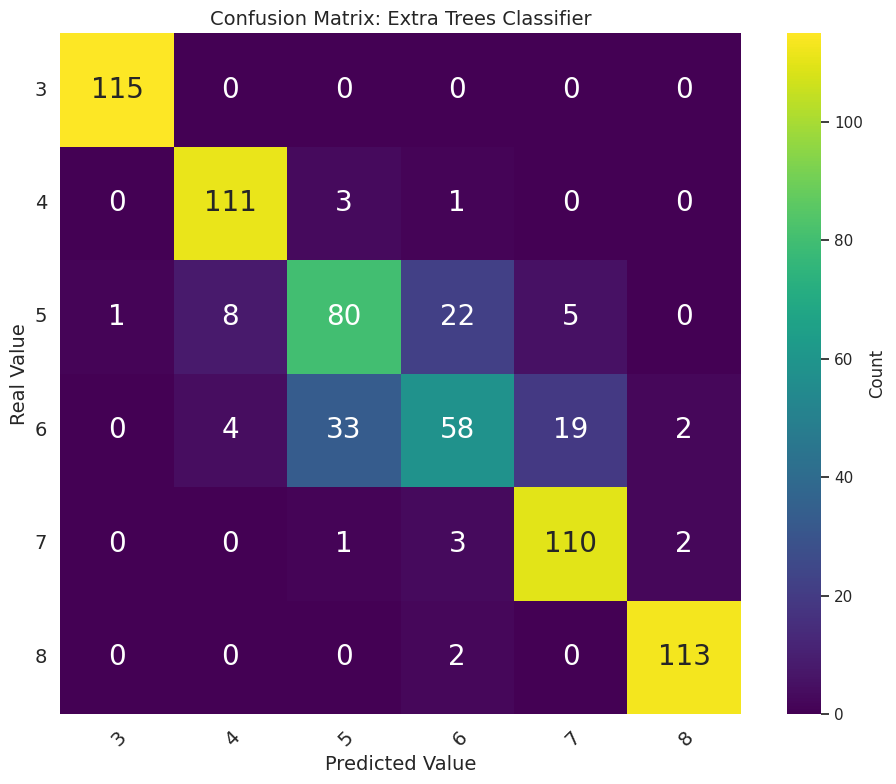

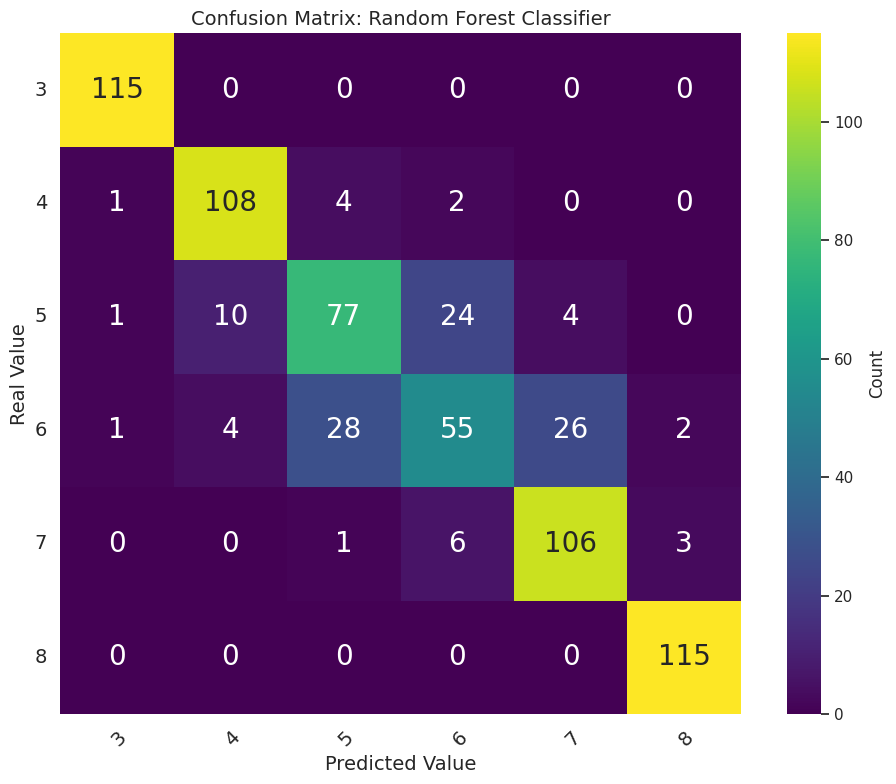

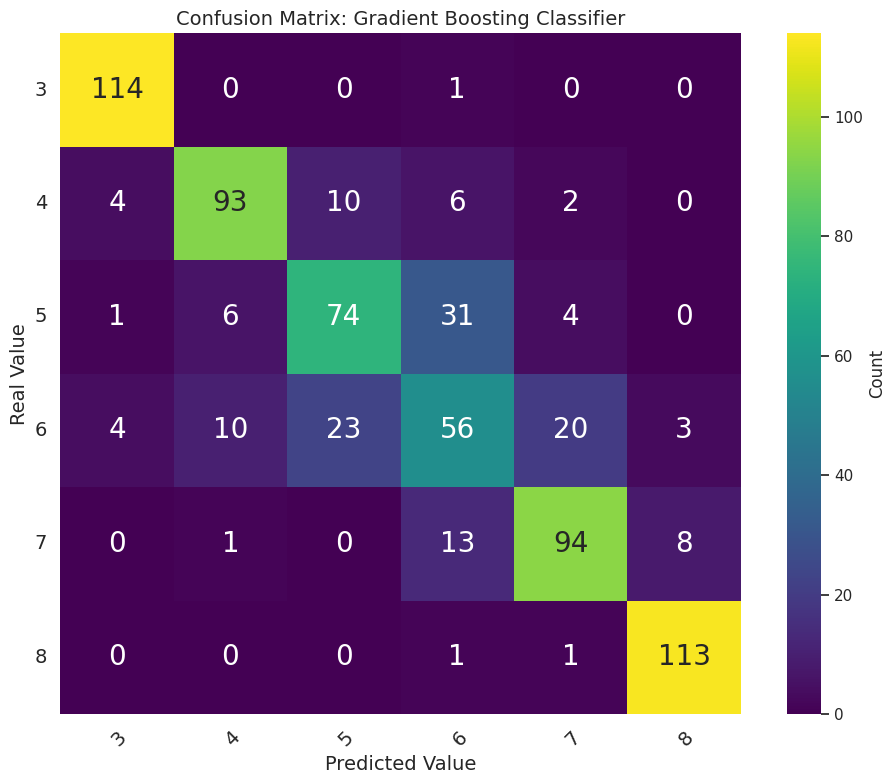

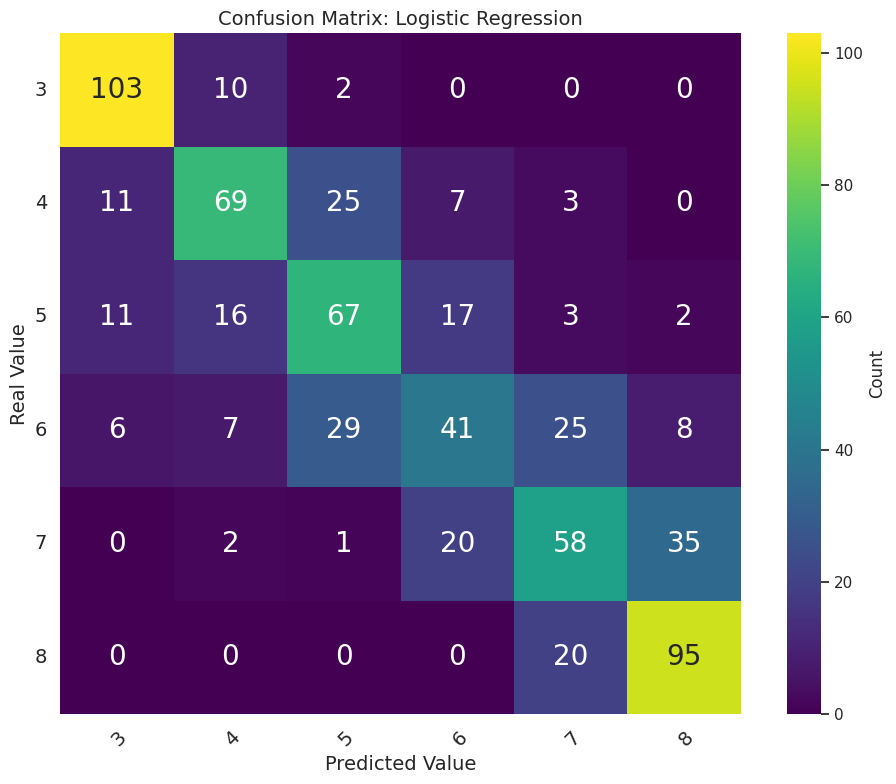

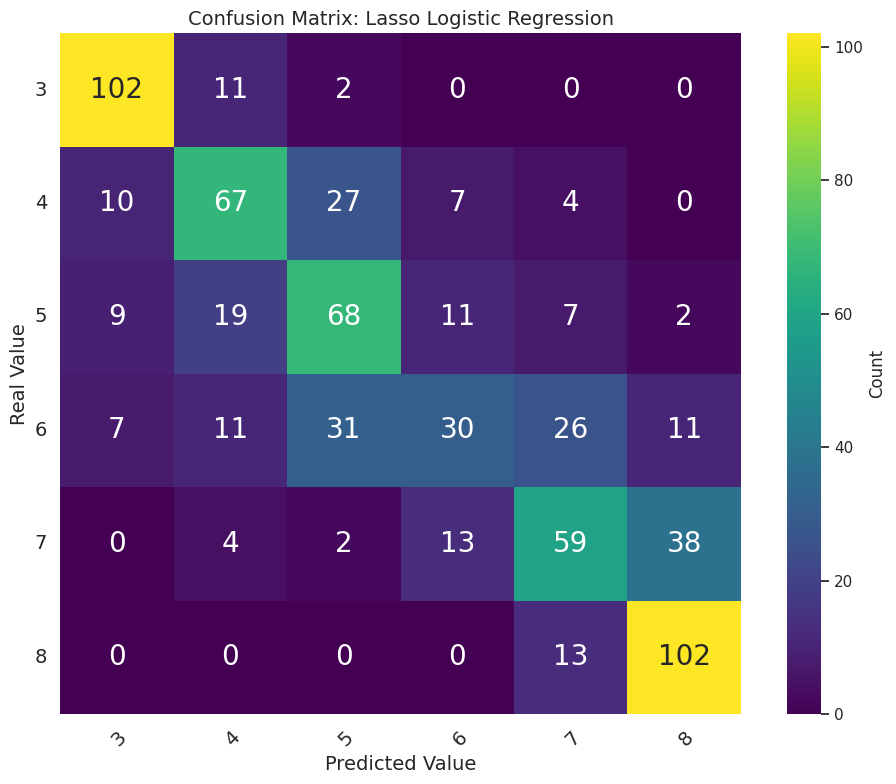

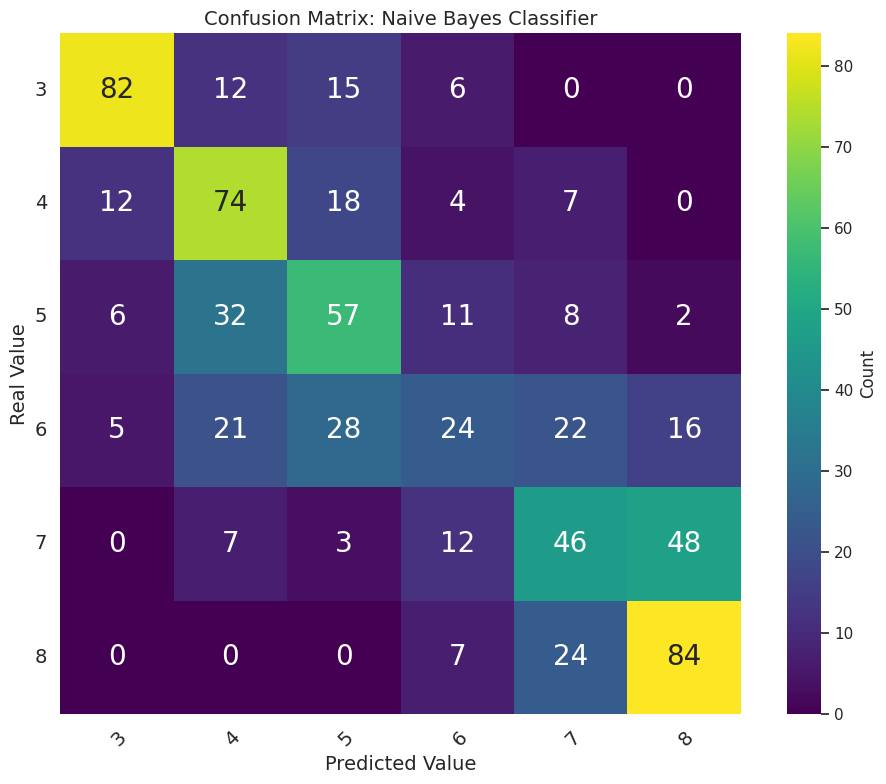

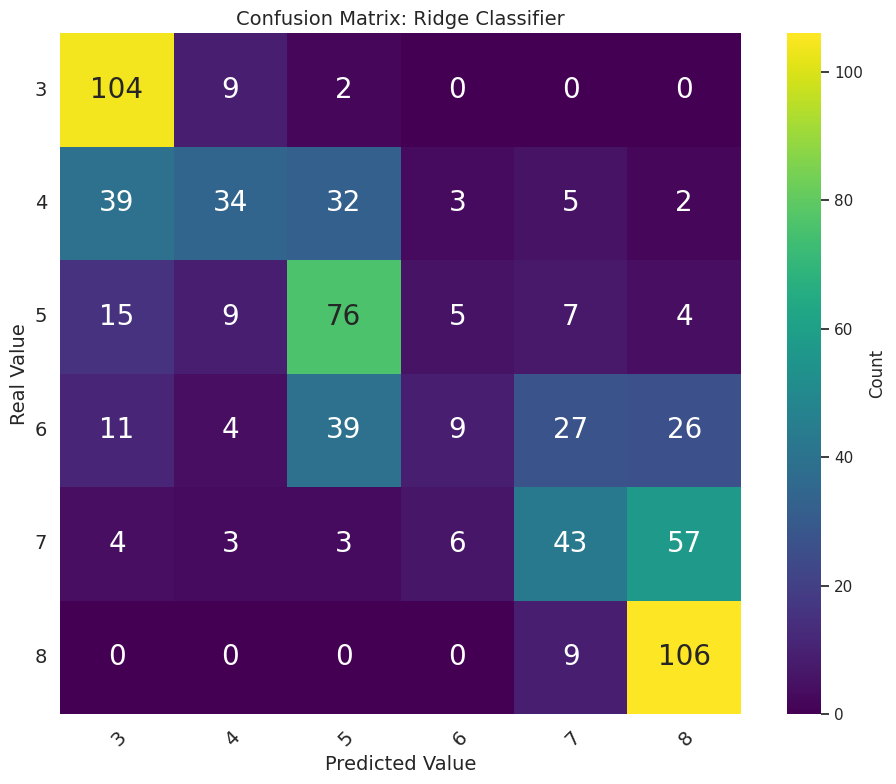

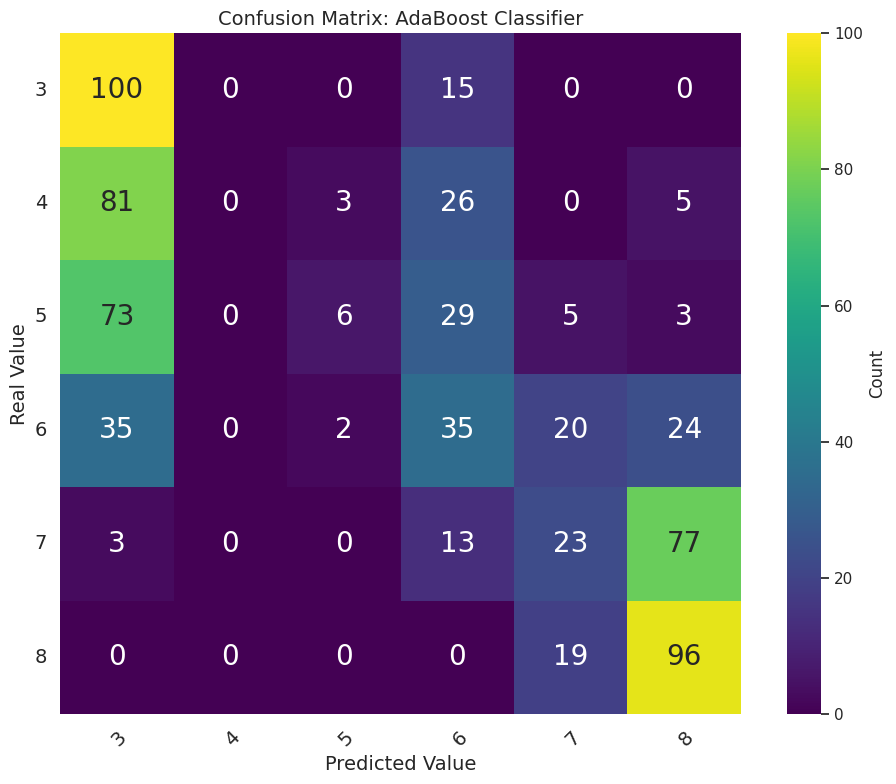

In [32]:
confusion_matrices = perform_df_red['Confusion Matrix'].to_dict()
for model_name, cm in confusion_matrices.items():
  plot_confusion_matrix(cm, ['3', '4', '5', '6', '7', '8'], model_name)

In [33]:
perform_df_white = pd.DataFrame(white_performance).T.sort_values(by='F1 Score', ascending=False)
perform_df_white

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Extra Trees Classifier,0.88,0.87,0.88,0.87,"[[356, 0, 1, 0, 0, 0, 0], [0, 347, 5, 4, 1, 0,..."
Random Forest Classifier,0.87,0.86,0.87,0.86,"[[357, 0, 0, 0, 0, 0, 0], [0, 347, 6, 3, 1, 0,..."
Gradient Boosting Classifier,0.75,0.74,0.75,0.75,"[[348, 5, 3, 1, 0, 0, 0], [5, 294, 32, 11, 11,..."
Logistic Regression,0.50,0.48,0.50,0.49,"[[110, 89, 23, 67, 20, 32, 16], [64, 212, 55, ..."
Naive Bayes Classifier,0.48,0.48,0.48,0.47,"[[152, 53, 98, 6, 37, 10, 1], [42, 181, 97, 13..."
Lasso Logistic Regression,0.49,0.46,0.49,0.47,"[[125, 104, 37, 49, 1, 21, 20], [47, 233, 50, ..."
Ridge Classifier,0.43,0.40,0.43,0.39,"[[88, 115, 53, 15, 1, 5, 80], [35, 239, 47, 3,..."
AdaBoost Classifier,0.29,0.28,0.29,0.19,"[[284, 73, 0, 0, 0, 0, 0], [306, 40, 0, 0, 0, ..."


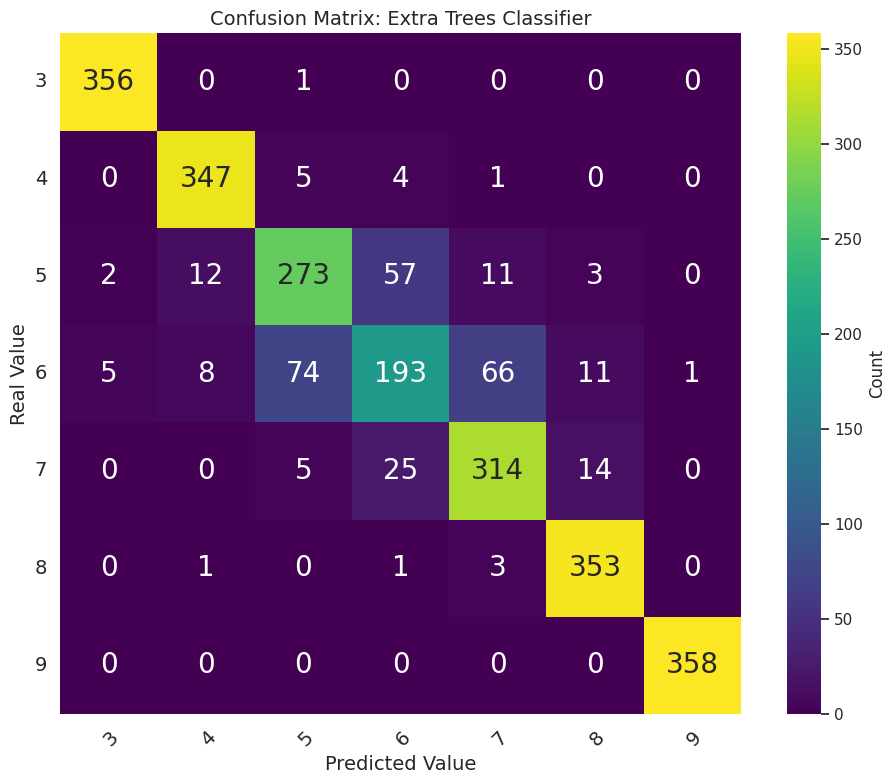

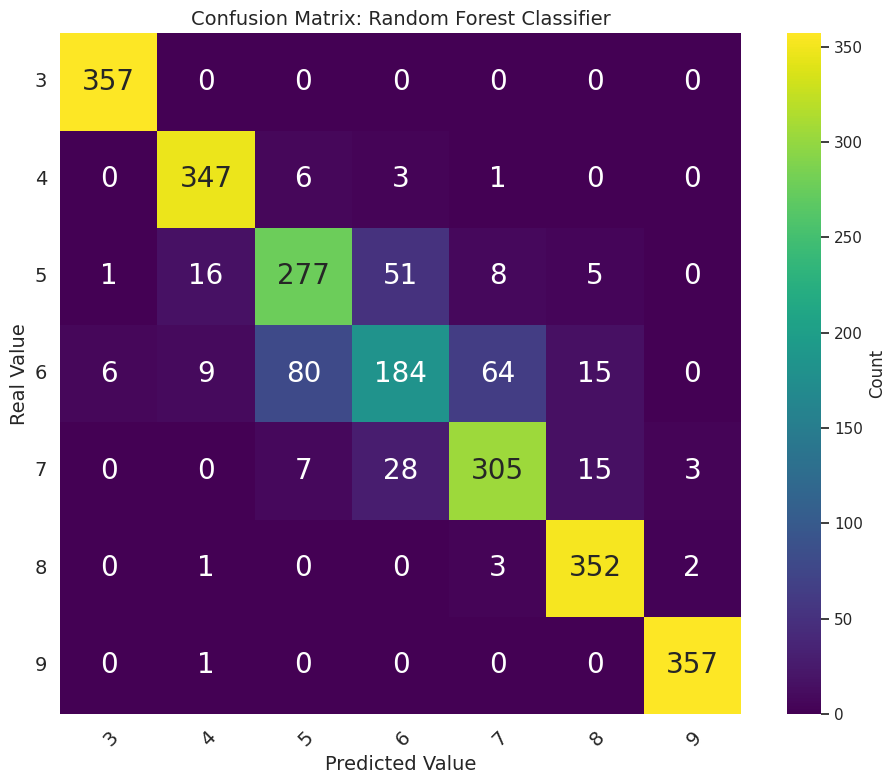

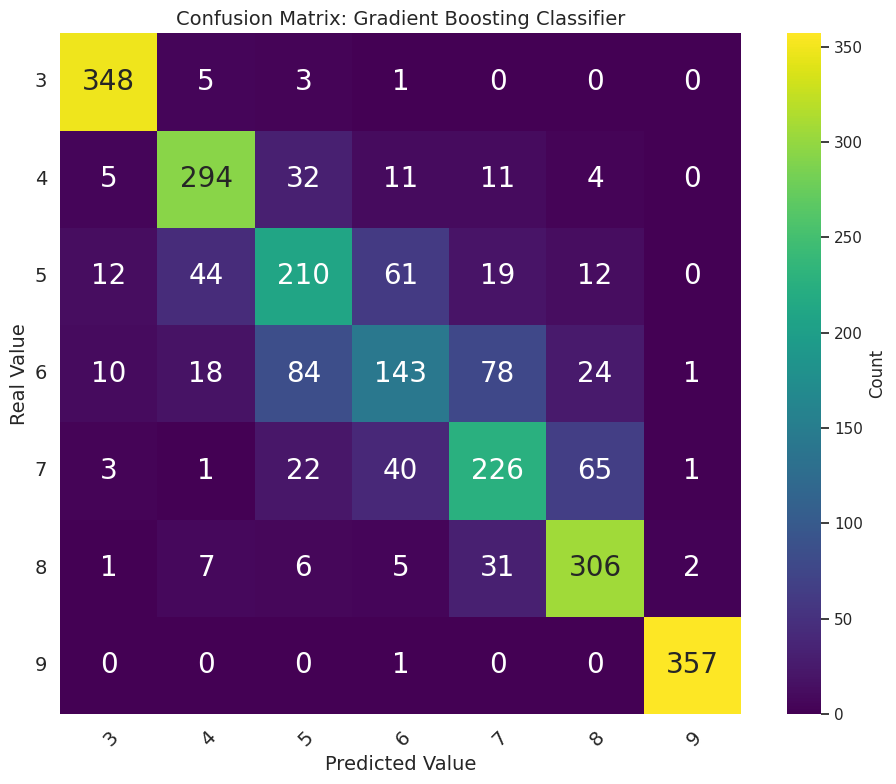

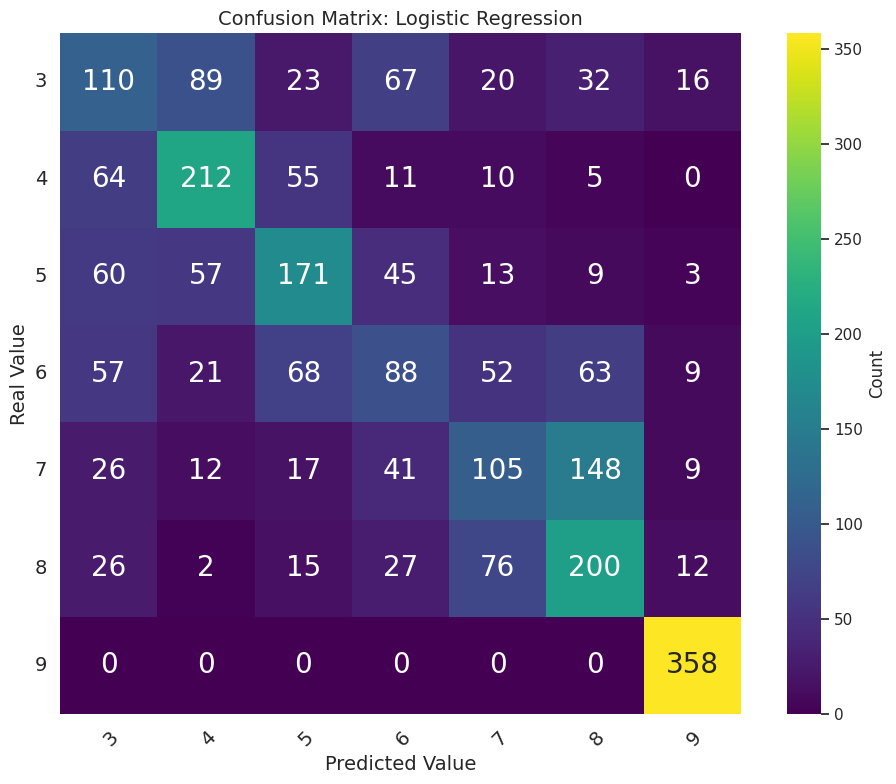

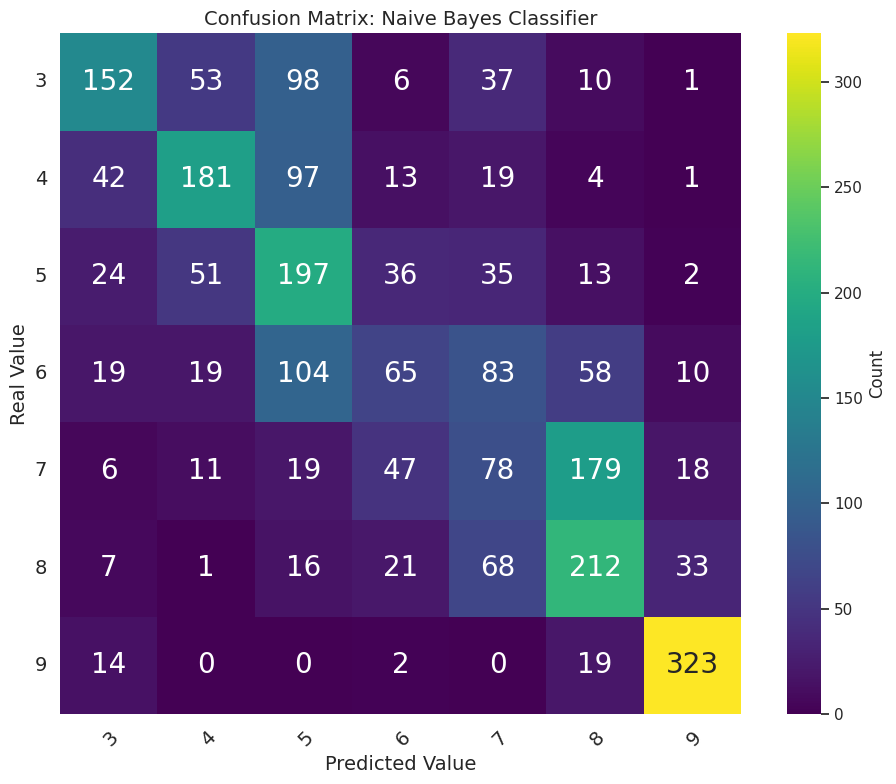

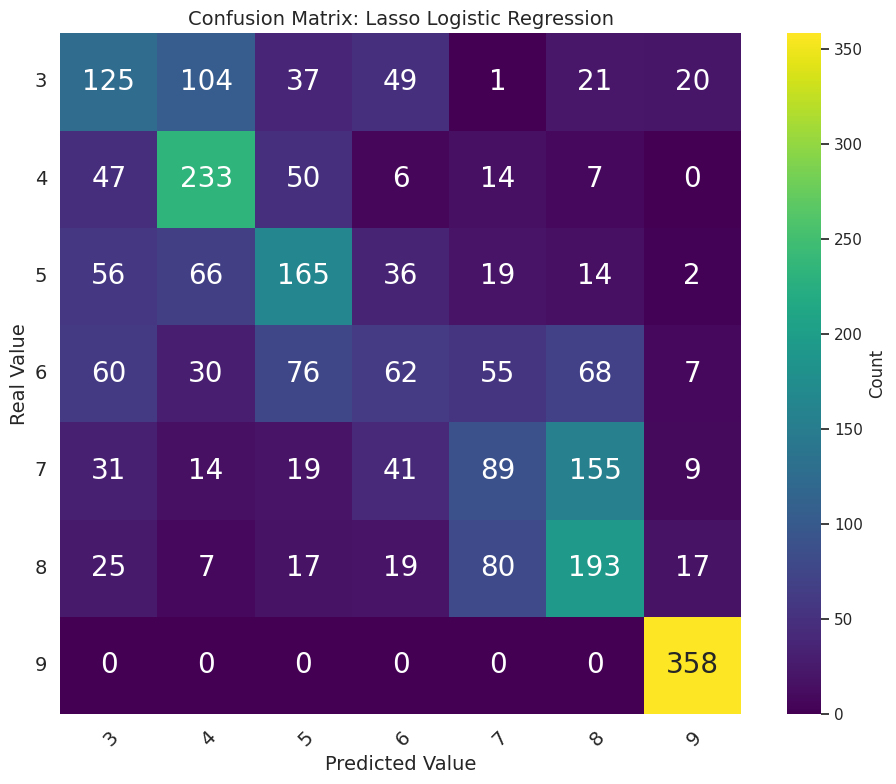

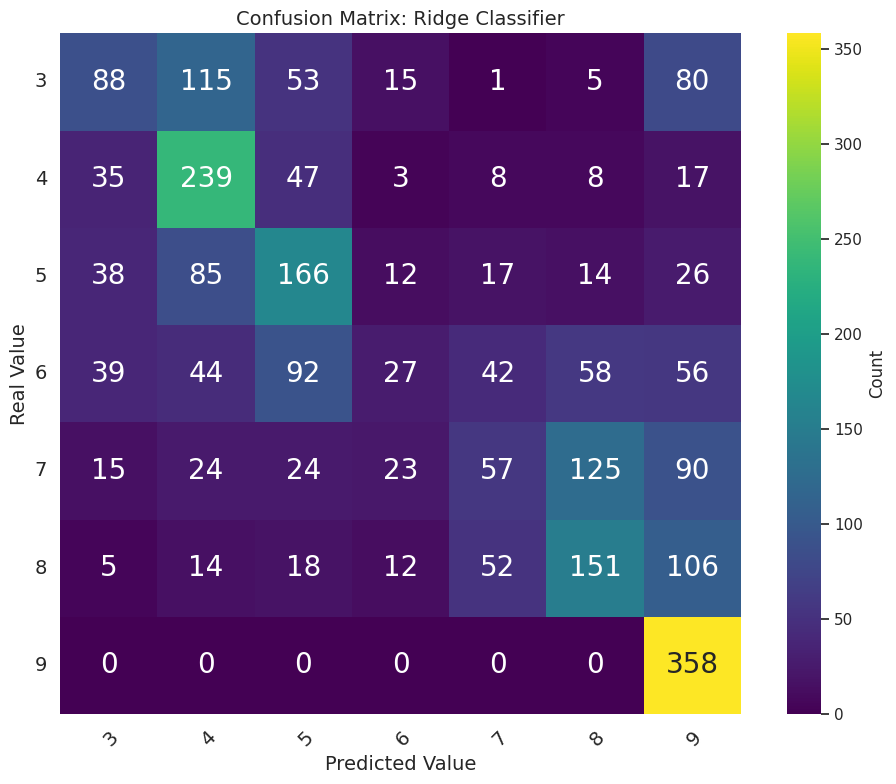

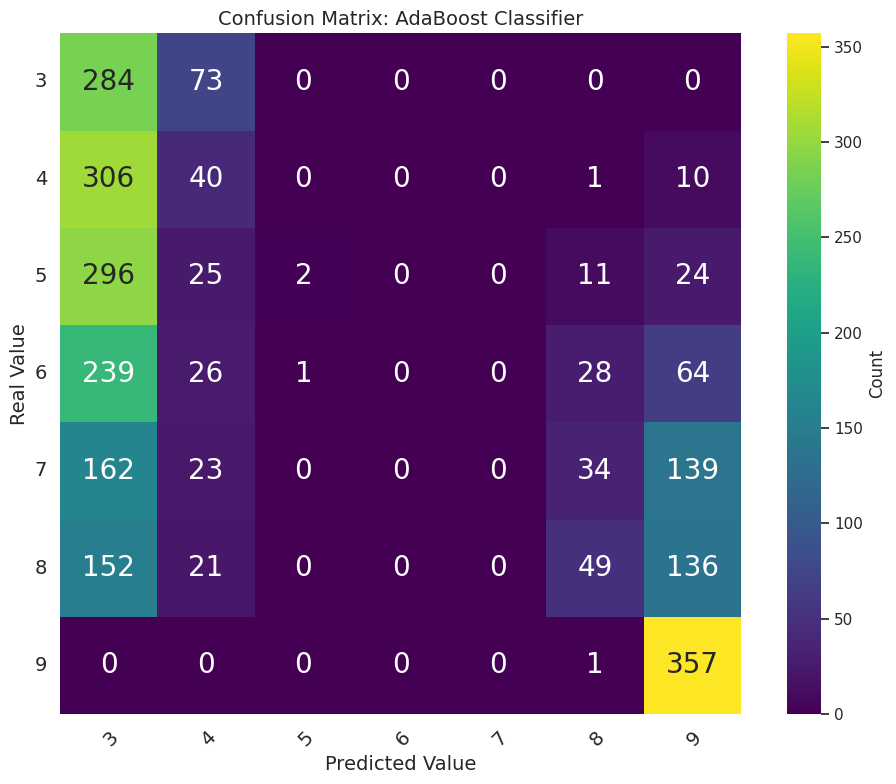

In [34]:
confusion_matrices = perform_df_white['Confusion Matrix'].to_dict()
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, ['3', '4', '5', '6', '7', '8', '9'], model_name)

It seems that the Extra Trees Regressor won across both of the wines.

 Let's color code the best metric across different metric.

In [35]:
def highlight_best(data, color='yellow'):
    # Apply the function column-wise using `axis=0`
    attr = f"background-color: {color};"
    if data.ndim == 1:  # Series
        is_max = data == data.max()
    else:  # DataFrame
        is_max = data.eq(data.max(axis=0), axis=1)
    return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)

perform_df_red.drop('Confusion Matrix', axis=1, inplace=True)
perform_df_red.style.apply(highlight_best, axis=None)

,Accuracy,Precision,Recall,F1 Score
Extra Trees Classifier,0.847042,0.839293,0.847042,0.840040
Random Forest Classifier,0.831169,0.821115,0.831169,0.823047
Gradient Boosting Classifier,0.784993,0.777921,0.784993,0.780639
Logistic Regression,0.624820,0.613433,0.624820,0.615220
Lasso Logistic Regression,0.617605,0.602622,0.617605,0.600655
Naive Bayes Classifier,0.529582,0.520218,0.529582,0.517216
Ridge Classifier,0.536797,0.513884,0.536797,0.484342
AdaBoost Classifier,0.375180,0.332955,0.375180,0.289078


In [36]:
def highlight_best(s, props='background-color:yellow'):
    return np.where(s == np.nanmax(s.values), props, '')
perform_df_white.drop('Confusion Matrix', axis=1, inplace=True)
perform_df_white.style.apply(highlight_best, props='background-color:yellow;', axis=0)

,Accuracy,Precision,Recall,F1 Score
Extra Trees Classifier,0.876198,0.870522,0.876198,0.871585
Random Forest Classifier,0.870208,0.863532,0.870208,0.864556
Gradient Boosting Classifier,0.752396,0.742996,0.752396,0.745370
Logistic Regression,0.496805,0.480498,0.496805,0.485411
Naive Bayes Classifier,0.482428,0.480804,0.482428,0.471531
Lasso Logistic Regression,0.489217,0.464900,0.489217,0.470879
Ridge Classifier,0.433706,0.399395,0.433706,0.385230
AdaBoost Classifier,0.292332,0.277285,0.292332,0.189755


It is clear that the Extra Trees Classifier was able to have the best evaluation metrics across the board, and thus become the best model.

Here's why the Extra Trees Classifier may have outperformed the other models:

1. **Ensemble Learning**: Extra Trees is an ensemble method that fits a number of randomized decision trees (extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Ensemble methods are generally more robust and accurate than individual models. Part of the reason why Random Forest and Gradient Boosting is up there as well

2. **Handling Variance and Bias**: Extra Trees can handle high variance and bias in data well. It builds multiple trees and splits nodes using random subsets of features, which contributes to a diversity that can lead to better generalization.

3. **No Pruning**: Extra Trees, like Random Forest, does not prune trees, which allows the model to fully exploit the variance of the data.

4. **Random Splits of Features**: The randomness in choosing the features to split the nodes can lead to a reduction in variance, even if that means a slight increase in bias.

Given its strong performance, the Extra Trees seems well-suited for practical application in predicting wine quality.


### Hyperparameter Optimization <a name="hyperparameter-optimization"></a>
- Techniques for hyperparameter tuning and model optimization.

1. **n_estimators**: Number of trees in the forest.
   - Larger numbers usually result in better performance but also increase computation time.

2. **max_depth**: Maximum depth of the tree.
   - Deeper trees can model more complex patterns but may lead to overfitting.

3. **min_samples_split**: Minimum number of samples required to split an internal node.
   - Higher values prevent the model from learning overly specific patterns (overfitting).

4. **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
   - Similar to `min_samples_split`, it helps in controlling overfitting.


In [37]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [30, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
}
grid_search = GridSearchCV(estimator = ExtraTreesClassifier(),
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_squared_error')
grid_search.fit(X_red_train, y_red_train)
best_red_params = grid_search.best_params_
best_red_grid = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [38]:
# Parameter grid remains the same as it's largely applicable to Extra Trees
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [30, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
}

# Using ExtraTreesRegressor as the estimator
grid_search = GridSearchCV(estimator = ExtraTreesClassifier(),
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_squared_error')

# Fitting the model with the white wine training data
grid_search.fit(X_white_train, y_white_train)

# Extracting the best parameters and best estimator
best_white_params = grid_search.best_params_
best_white_grid = grid_search.best_estimator_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


## Results and Discussion <a name="results-and-discussion"></a>


### Model Performance <a name="model-performance"></a>
- Interpretation of the model results and performance analysis.

In [39]:
# Predicting using the optimized model for red wine
predictions_red = best_red_grid.predict(X_red_test)

# Training the baseline Random Forest model again, this time for red wine
baseline_et_red = ExtraTreesClassifier(random_state=42)
baseline_et_red.fit(X_red_train, y_red_train)
baseline_predictions_red = baseline_et_red.predict(X_red_test)

# Calculate performance metrics for the baseline Random Forest model on red wine
baseline_performance_red = {
    'Accuracy': accuracy_score(y_red_test, baseline_predictions_red),
    'Precision': precision_score(y_red_test, baseline_predictions_red, average='weighted'),
    'Recall': recall_score(y_red_test, baseline_predictions_red, average='weighted'),
    'F1 Score': f1_score(y_red_test, baseline_predictions_red, average='weighted'),
}

# Calculate performance metrics for the optimized model on red wine
optimized_performance_red = {
    'Accuracy': accuracy_score(y_red_test, predictions_red),
    'Precision': precision_score(y_red_test, predictions_red, average='weighted'),
    'Recall': recall_score(y_red_test, predictions_red, average='weighted'),
    'F1 Score': f1_score(y_red_test, predictions_red, average='weighted'),
}

# Combine both into a DataFrame for comparison
comparison_df_red = pd.DataFrame([baseline_performance_red, optimized_performance_red],
                                 index=['Baseline ET Red', 'Optimized ET Red'])

comparison_df_red.style.apply(highlight_best, axis=None)

,Accuracy,Precision,Recall,F1 Score
Baseline ET Red,0.847042,0.839293,0.847042,0.840040
Optimized ET Red,0.844156,0.836069,0.844156,0.838488


In [40]:
# Predicting using the optimized Extra Trees model for white wine
predictions_white = best_white_grid.predict(X_white_test)

# Training the baseline Random Forest model again, but this time for white wine
baseline_et_white = ExtraTreesClassifier(random_state=42)
baseline_et_white.fit(X_white_train, y_white_train)
baseline_predictions_white = baseline_et_white.predict(X_white_test)

# Calculate performance metrics for the baseline Random Forest model on white wine
baseline_performance_white = {
    'Accuracy': accuracy_score(y_white_test, baseline_predictions_white),
    'Precision': precision_score(y_white_test, baseline_predictions_white, average='weighted'),
    'Recall': recall_score(y_white_test, baseline_predictions_white, average='weighted'),
    'F1 Score': f1_score(y_white_test, baseline_predictions_white, average='weighted'),
}

# Calculate performance metrics for the optimized Extra Trees model on white wine
optimized_performance_white = {
    'Accuracy': accuracy_score(y_white_test, predictions_white),
    'Precision': precision_score(y_white_test, predictions_white, average='weighted'),
    'Recall': recall_score(y_white_test, predictions_white, average='weighted'),
    'F1 Score': f1_score(y_white_test, predictions_white, average='weighted'),
}

# Combine both into a DataFrame for comparison
comparison_df_white = pd.DataFrame([baseline_performance_white, optimized_performance_white],
                                   index=['Baseline ET White', 'Optimized ET White'])

comparison_df_white.style.apply(highlight_best, axis=None)

,Accuracy,Precision,Recall,F1 Score
Baseline ET White,0.876198,0.870522,0.876198,0.871585
Optimized ET White,0.886182,0.881092,0.886182,0.881793


In [ ]:
best_red_params, best_white_params

({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 {'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300})

The optimized model is marginally better than the baseline model in all aspects.

### Feature Importance <a name="feature-importance"></a>
- Analysis of feature importance in the model.

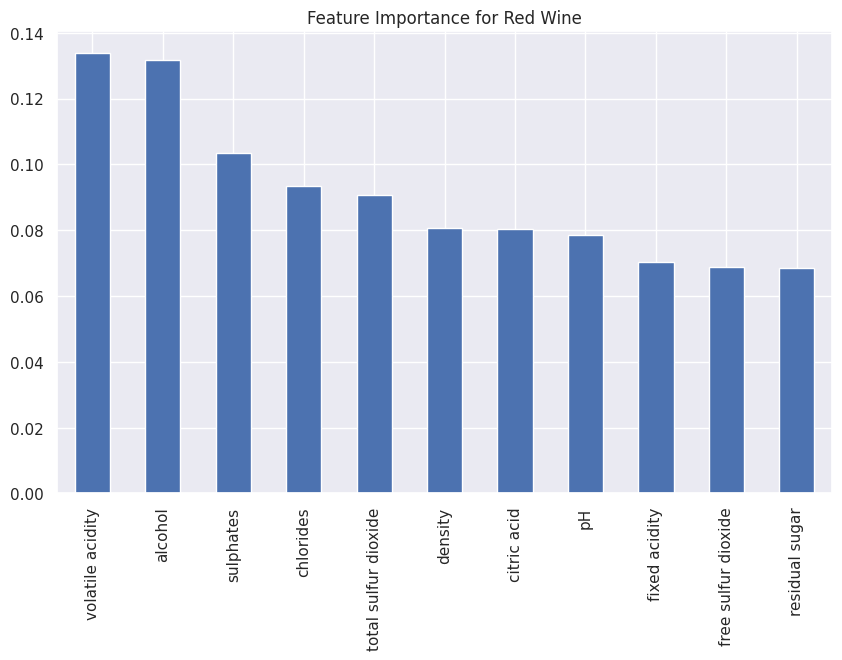

In [ ]:
# Extract feature importances from the optimized model for red wine
feature_importances_red = best_red_grid.feature_importances_

# Create a pandas Series with feature importances, ensuring the use of red wine features
features_red = pd.Series(feature_importances_red, index=X_red_train.columns)

# Sort the features based on importance
sorted_features_red = features_red.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,6))
sorted_features_red.plot(kind='bar')
plt.title('Feature Importance for Red Wine')
plt.show()

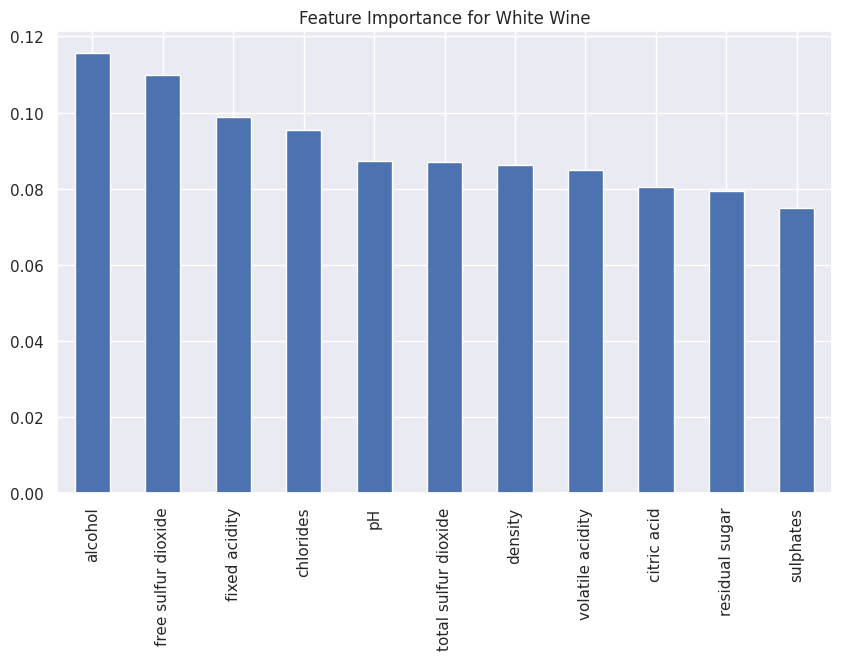

In [ ]:
# Extract feature importances from the optimized model for white wine
feature_importances_white = best_white_grid.feature_importances_

# Create a pandas Series with feature importances, using the white wine features
features_white = pd.Series(feature_importances_white, index=X_white_train.columns)

# Sort the features based on importance
sorted_features_white = features_white.sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,6))
sorted_features_white.plot(kind='bar')
plt.title('Feature Importance for White Wine')
plt.show()

The feature importance somewhat resemble the correlation and feature selection analysis we have done earlier, with some variables in different places.

### Insights <a name="insights"></a>
- Insights on factors influencing wine quality.

**Red Wine Revelations:**
- **Volatile Acidity & Alcohol:** More isn't always better. Find the sweet spot for complexity without the vinegar hit, and aim for that robust alcohol level for quality.
- **Sulphates & Chlorides:** They're the silent guardians of flavor and freshness. Keep them balanced, and your red will thank you.
- **Total Sulfur Dioxide:** It's all about longevity. Not the star of the show, but it keeps the performance going.
- **Density & pH:** These backstage heroes ensure the wine's body and zest are on point.

**White Wine Wisdom:**
- **Alcohol & Free Sulfur Dioxide:** Alcohol warms, sulfur protects. White wine's dynamic duo for a top-notch tipple.
- **Fixed Acidity & Chlorides:** Crisp and zesty or flat and forgettable? These determine your sip's fate.
- **pH & Density:** Acidity levels and body balance—get these right for that perfect glass of white.
- **Citric Acid & Residual Sugar:** The zest and sweet whisper that can turn a good white into a great one.
- **Sulphates:** Less is more for white wine's charm. Keep it subtle.

**Bottom Line:**
Balance is key in both reds and whites. Hit the high notes on the right features, and you'll have a symphony in a bottle!

### Model usecases

Predicting wine quality based on certain features using a data-driven model can have several practical and beneficial use cases across different aspects of the wine industry:

1. **Quality Control:** Winemakers can use the model to assess the quality of their wine during the production process, allowing for adjustments in winemaking techniques to improve quality before bottling.

2. **Inventory Management:** Distributors and retailers can prioritize inventory turnover strategies based on predicted quality, ensuring that higher quality wines are marketed and sold within optimal timeframes.

3. **Pricing Strategy:** By predicting quality, producers and retailers can more accurately price their wines. Higher-quality wines can command a premium, while those with lower predicted quality can be positioned differently in the market.

4. **Consumer Insights:** The model can help retailers and sommeliers recommend wines to customers based on their preferences for certain features that are associated with quality.

5. **Wine Investment:** Collectors and investors could use the model to identify potentially high-quality wines for investment purposes, which could become more valuable over time.

6. **Blending Optimization:** Winemakers might use the model to determine the best combination of varietals or batches that will result in a high-quality blend.

7. **Educational Tool:** The model can serve as an educational tool for enology students to understand the impact of different physicochemical properties on the quality of wine.

8. **Benchmarking and Competitions:** The model could be used to benchmark wines or as a preliminary screening tool in wine competitions before human experts taste and give the final verdict.


## Conclusion and Recommendations <a name="conclusion-and-recommendations"></a>

### Recommendations <a name="recommendations"></a>
- Potential improvements and suggestions for further research.

General Recommendations
- Chemical balance, preservation and fermentation control are crucial factors influencing red wine quality
- Winemakers can follow the insights layed out a few cells back.
- Invest in training for staff to use tools to detect physicochemical indicators of wine, so as to enhance quality control and wine processing techniques


Actionable steps
- Winemakers making higher-quality white wines can do the same, but place more importance on free sulfur dioxide and density, shifting attention away from sulphates and total sulfur dioxide.
- Develop strategies for harvest timing and fermentation control to achieve optimal alcohol level
- Investigate the impact of soil and water sources on chloride levels in grapes
- Use advanced preservation techniques to maintain sulfur dioxide levels to ensure longevity without compromising taste



### Future Scope <a name="future-scope"></a>
- Discussion on the future scope of the project.


- Researchers can combine the dataset to predict whether a wine is considered a red or white wine depending on its physicochemical indicators
- Researchers can also conduct in-depth research into changing consumer preferences, by gathering wine quality data from different time periods
- Researchers can also gather additional data like wine brand, wine price, demographic of those who tried the wine...
- Researchers can also research the health aspects of wine consumption


## References <a name="references"></a>
### Literature Cited <a name="literature-cited"></a>
- Citations of datasets, papers, articles, or other resources referenced in the project.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.